<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 머신러닝 모델링을 할 때 자주 사용되는 전처리 방법을 리뷰합니다.
- 익숙하지 않은 방법은 반복 실습을 통해 익숙해져야 합니다.
- 다룰 내용
    - 라이브러리 불러오기
    - 데이터 불러오기
    - 불필요한 변수 제거
    - NaN 조치
    - 가변수화

# 1.라이브러리, 데이터 불러오기

- 우선 사용할 라이브러리와 분석 대상 데이터를 불러옵니다.

## 1.1. 라이브러리 불러오기

- 사용할 라이브러리를 불러옵니다.

In [115]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. 데이터 읽어오기

- 분석 대상 데이터를 읽어옵니다.

In [116]:
# 데이터 읽어오기
path = "https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv"
titanic = pd.read_csv(path)

In [117]:
# 상위 데이터 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
titanic.shape

(891, 12)

# 2.불필요한 변수 제거

- Cabin은 77.1%가 NaN이기에 채울 방법이 마땅치 않으니 제거합니다.
- PassengerId, Name, Ticket은 Unique 한 값이므로 제거합니다.
- axis=0는 행, axis=1은 열을 의미함을 기억하세요.
- 이미 변수간의 상관관계 확인했다고 가정. ex) Pclass와 Survived는 상관관계가 있음을 알기에 열 제거하면 안 됨

In [119]:
# 여러 열 동시 제거
drop_cols = ['Cabin', 'PassengerId', 'Name', 'Ticket']
# Name 제거하기 전에 Mr, Mrs, Miss 등 꺼내는 작업 해도 O

titanic.drop(drop_cols, axis=1, inplace=True)
# titanic.drop(columns = drop_cols, inplace=True) # 이렇게 써줘도 O
# titanic.drop(drop_cols, axis='columns', inplace=True) # 얘도 가능
# titanic = titanic.drop(drop_cols, axis=1) # 얘도 가능

titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [120]:
# 확인
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [121]:
# 이후 반복 실습을 위해 원본 보관
titanic_bk = titanic.copy()
# titanic_bk = titanic # 이런 식으로 쓸 경우 titanic을 바꾸면 titanic_bk도 바뀌게 됨

# 3.NaN 조치

- NaN 값이 포함되어 있으면 정확한 분석과 예측을 할 수 없으니 이에 대한 처리가 필요합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/nan.png' width=700 align="left"/>

## 3.1. NaN 확인

- NaN 값이 있는지 우선 확인합니다.

In [122]:
titanic.isna() # 이런 식으로 볼 경우 결측치가 몇 갠지 확인이 어려움

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [123]:
# 변수들의 NaN 포함 상태 확인
titanic.isna().sum()
# titanic.isna().sum(axis=0) # 다음과 같이 행을 더해 열 별로 출력하라는 의미의 axis=0이 생략되어 있는 것

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [124]:
# 변수들의 NaN 비율 (%로 확인)
titanic.isna().sum() / len(titanic) * 100

# len: 데이터프레임의 행 개수 구하기

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

## 3.2. NaN 삭제

- NaN 값이 포함된 행이나 열이 중요하지 않다면 해당 행이나 열을 제거합니다.
    - → 해당 열이 중요한지 중요하지 않은지는 분석을 해봐야 함 (하지만 중요하지 않았다면 상관관계 분석했던 이전 단계에서 이미 날렸을 것이므로 열을 그냥 날리는 건 위험함)
- NaN 값이 너무 많이 포함된 경우, 적절히 채울 수 없다면 해당 행과 열을 제거합니다.

### 3.2.1. 행 제거

- NaN 값이 포함된 행이 그리 많지 않다면 해당 행을 제거합니다.
- 모든 행을 제거하거나 일부 행을 제거할 수 있습니다.

**1) 모든 행 제거**

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_01.png' width=300 align="left"/>

In [125]:
# 처리전 확인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [126]:
# NaN이 포함된 모든 행(axis=0) 제거
titanic.dropna(axis=0, inplace=True) # default는 결측치 하나라도 포함된 행이면 (how='any') 행 제거 (axis=0/'index')

# 확인
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [127]:
# 데이터 크기 확인
titanic.shape

(712, 8)

In [128]:
# 이후 실습을 위해 원상복구
titanic = titanic_bk.copy()

**2) 일부 행 제거**

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_02.png' width=300 align="left"/>

In [129]:
# 처리전 확인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [130]:
# Age 변수에 NaN이 포함된 행 제거
titanic.dropna(subset=['Age'], axis=0, inplace=True)

# 확인
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [131]:
titanic.shape

(714, 8)

In [132]:
# 이후 실습을 위해 원상복구
titanic = titanic_bk.copy()

### 3.2.2. 변수 제거

- NaN 값이 포함된 변수가 그리 중요하지 않거나, NaN 값이 너무 많다면 해당 변수를 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_03.png' width=300 align="left"/>

In [133]:
# 처리전 확인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [134]:
# NaN 열이 포함된 모든 변수(axis=1) 제거
titanic.dropna(axis=1, inplace=True)

# 확인
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [135]:
titanic.shape

(891, 6)

In [136]:
# 이후 실습을 위해 원복
titanic = titanic_bk.copy()

## 3.3. NaN 채우기

- NaN 값이 포함된 행이나 열을 제거할 수 없다면 특정 값으로 채웁니다.

### 3.3.1. 특정 값으로 채우기

- 임의의 값을 지정해 NaN 값을 채웁니다.
- 평균값이나 최빈값으로 채우는 경우가 많습니다.

In [137]:
# 처리전 확인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**1) 평균값으로 채우기**

In [138]:
# Age 평균 구하기
mean_age = titanic['Age'].mean() # 중앙값은 median()
# 단순히 전체 승객의 나이의 평균 값이 아닌 성별 별로 평균 나이 구해서 채울 수도 있을 것
# 키라면 성별, 나이 별 평균 키로 구하는 식으로 해도 O

# NaN을 평균값으로 채우기
titanic['Age'].fillna(mean_age, inplace=True)

# 확인
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

**2) 최빈값으로 채우기**

In [139]:
# Embarked 변수 값 확인
titanic['Embarked'].value_counts() # default: dropna=True
# titanic['Embarked'].value_counts(dropna=False) # 결측치 개수까지 포함해 보여줌

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [140]:
# 최빈값 확인 #1 
titanic['Embarked'].value_counts().idxmax()

'S'

In [145]:
# 최빈값 확인 #2
titanic['Embarked'].mode()[0]

'S'

In [146]:
# NaN 값을 가장 빈도가 높은 값으로 채우기
titanic['Embarked'].fillna('S', inplace=True)

# 확인
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 3.3.2. 앞/뒤 값으로 채우기

- 시계열 데이터인 경우 많이 사용하는 방법입니다.
- method='ffill': 바로 앞의 값으로 채우기
- method='bfill': 바로 뒤의 값으로 채우기

<img src='https://raw.githubusercontent.com/Jangrae/img/master/ffill_bfill.png' width=600 align="left"/>

In [147]:
# 데이터 불러오기
# Ozone 농도 예측하는 데이터
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [148]:
# 이후 반복 실습을 위해 원본 보관
air_bk = air.copy()

In [149]:
# 처리전 확인
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [150]:
# Ozone 변수 NaN 값을 바로 앞의 값으로 채우기
air['Ozone'].fillna(method='ffill', inplace=True)

# Solar.R 변수 NaN 값을 바로 뒤의 값으로 채우기
air['Solar.R'].fillna(method='bfill', inplace=True)

# 확인
air.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,18.0,299.0,14.3,56,5,5
5,28.0,299.0,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,8.0,194.0,8.6,69,5,10


In [151]:
air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [152]:
# 이후 실습을 위해 원복
air = air_bk.copy()

### 3.3.3. 선형 보간법으로 채우기

- interpolate 메서드에 method='linear' 옵션을 지정해 선형 보간법으로 채웁니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/interpolate.png' width=300 align="left"/>

In [153]:
# 처리전 확인
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [155]:
# 선형 보간법으로 채우기
# air['Ozone'].interpolate(method='linear', inplace=True)
# air['Solar.R'].interpolate(method='linear', inplace=True)
air.interpolate(method='linear', inplace=True) # 두 행에만 결측치가 있는 것을 알고 있으므로, 그 두 행을 한 번에 보간법으로 채우려면 이렇게 써줘도 됨

# 확인
air.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.000000,7.4,67,5,1
1,36.0,118.000000,8.0,72,5,2
2,12.0,149.000000,12.6,74,5,3
3,18.0,313.000000,11.5,62,5,4
4,23.0,308.333333,14.3,56,5,5
5,28.0,303.666667,14.9,66,5,6
6,23.0,299.000000,8.6,65,5,7
7,19.0,99.000000,13.8,59,5,8
8,8.0,19.000000,20.1,61,5,9
9,7.5,194.000000,8.6,69,5,10


In [156]:
air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

# 4.가변수화

- 목적 1. 문자열로 된 값을 숫자로 바꿔주기 위함 (True/False도 가능. 어차피 1/0으로 인식하므로) → 필수
- 목적 2. 숫자형 범주값을 크기별로 구분하지 않도록 → 선택
- => 해야 될지 말아야 할지 모르겠다면 일단 해보고 성능 향상 있는지 살펴봐라

- 범주형 값을 갖는 변수에 대한 One-Hot Encoding을 진행합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/get_dummies1.png' width=700 align="left"/>

- 다중공선성 문제를 없애기 위해 drop_first=True 옵션을 지정합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/get_dummies2.png' width=600 align="left"/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/multicollinearity.png' width=500 align="left"/>

- 각 열에 대한 상관관계 분석을 진행한 후 상관관계가 매우 큰 두 열에 대해서는 하나의 열만 남기는 게 좋음
- 만약 범주 범위가 너무 크다면 ex)1000개 그룹 => 가변수화 진행시 오히려 성능 떨어지는 경우가 있음 -> 또 모델의 종류에 따라 뭐가 더 좋을지는 다름 -> 가변수화 할지 말지는 재량에 달림
    - label encoding (문자열로 된 걸 그냥 1, 2, 3, 4...처럼 숫자로 바꿔주는 인코딩 방식) 써도 되고,
    - one hot encoding 방식 써도 됨. 일단 돌려보고 모델의 성능에 영향 있는지 확인
    - 후자의 방식 쓸 경우, 전자의 경우와 달리 각각의 범주일 경우에 대해 y값에 얼마나 영향 미치는지 알 수 있다는 장점이 있음. 예를 들어, S국에서 탑승한 사람들이 많이 생존했는지? 알 수 있음
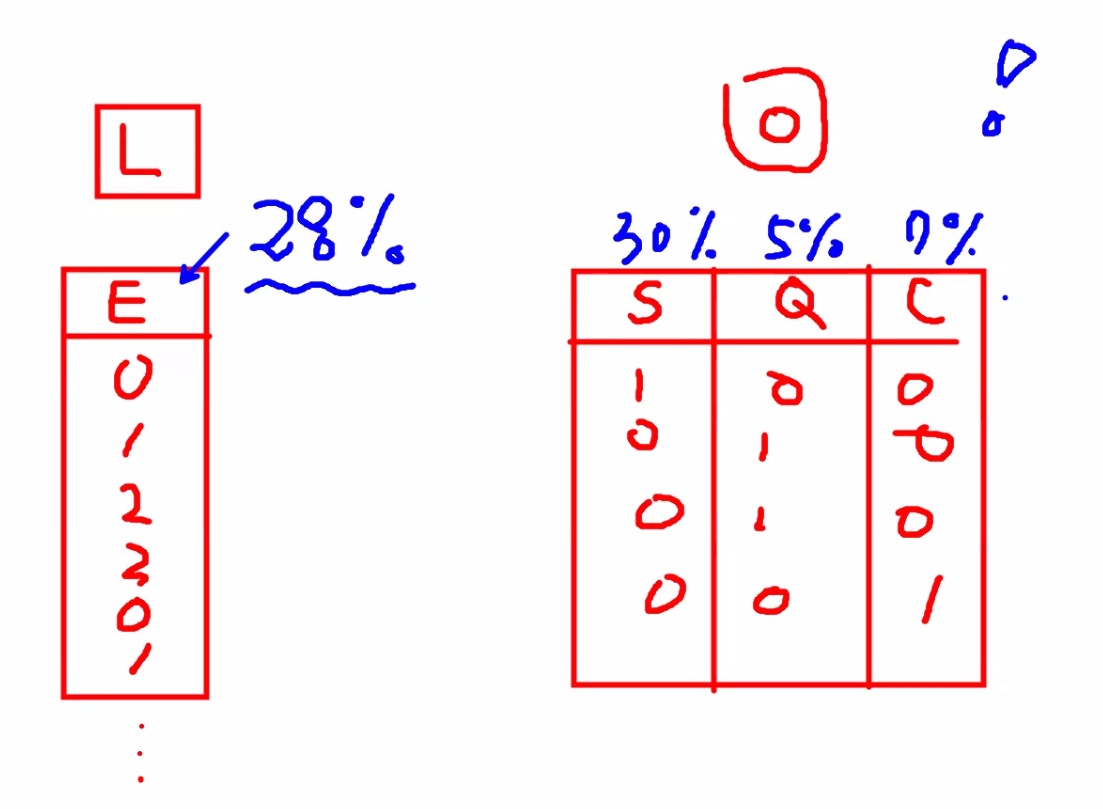

In [157]:
# 처리전 확인
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [158]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


문자열인 Sex와 Embarked, 그리고 범주형 변수인 Pclass는 가변수화 필요 => 어떤 변수를 가변수화 할지는 재량껏

In [159]:
# 가변수 대상 변수 식별
dumm_cols = ['Pclass', 'Sex', 'Embarked']

# 가변수화
titanic = pd.get_dummies(titanic, columns=dumm_cols, drop_first=True, dtype=int)
# dtype을 int로 설정해주지 않으면 1과 0 대신 True와 False. 즉, bool 형식으로 나옴 -> pandas 버전 별로 다름
# 이전 버전에 대한 호환성 위해 dtype=int로 명시해 주는 게 좋음

# 확인
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [160]:
print(pd.__version__)

2.0.3
